## Supervised Learning Project- Personal Loan 

### Importing Libraries 

In [ ]:
#Basic Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading data

In [ ]:
# Reading data
bank=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
#Exploring the data
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


This data have 5000 rows and 14 columns with no missing values

In [ ]:
bank.describe().T # describing summary statistics of data

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


<b>Insights from above summary statistics are</b>

* Experience have minimum value -3 which is not possible so we should check how many entries are there with this value
* Mortgage is postively skewed data where 75 % of data within 101.7 but maximum value is 635

In [ ]:
# checking for number of records where experience is negative
exp_neg=bank.loc[(bank['Age']<=30)&(bank['Experience']<0)]
len(exp_neg.index)


52

In [ ]:
bank[bank < 0]=np.nan # Replace negative values with nan
exp_mean=bank['Experience'].mean()
bank['Experience']=bank['Experience'].fillna(exp_mean)#replace nan with mean


We have 52 entries with experience as negative values which cannot be possible So we have replaced the negative values with average experience

In [ ]:
# creating dummy variables for education
bank['Education'] = pd.get_dummies(bank['Education'], drop_first=True)
bank['Education'].value_counts()
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1.0,49,91107,4,1.6,0,0,0,1,0,0,0
1,2,45,19.0,34,90089,3,1.5,0,0,0,1,0,0,0
2,3,39,15.0,11,94720,1,1.0,0,0,0,0,0,0,0
3,4,35,9.0,100,94112,1,2.7,1,0,0,0,0,0,0
4,5,35,8.0,45,91330,4,1.0,1,0,0,0,0,0,1


### Visualization of data

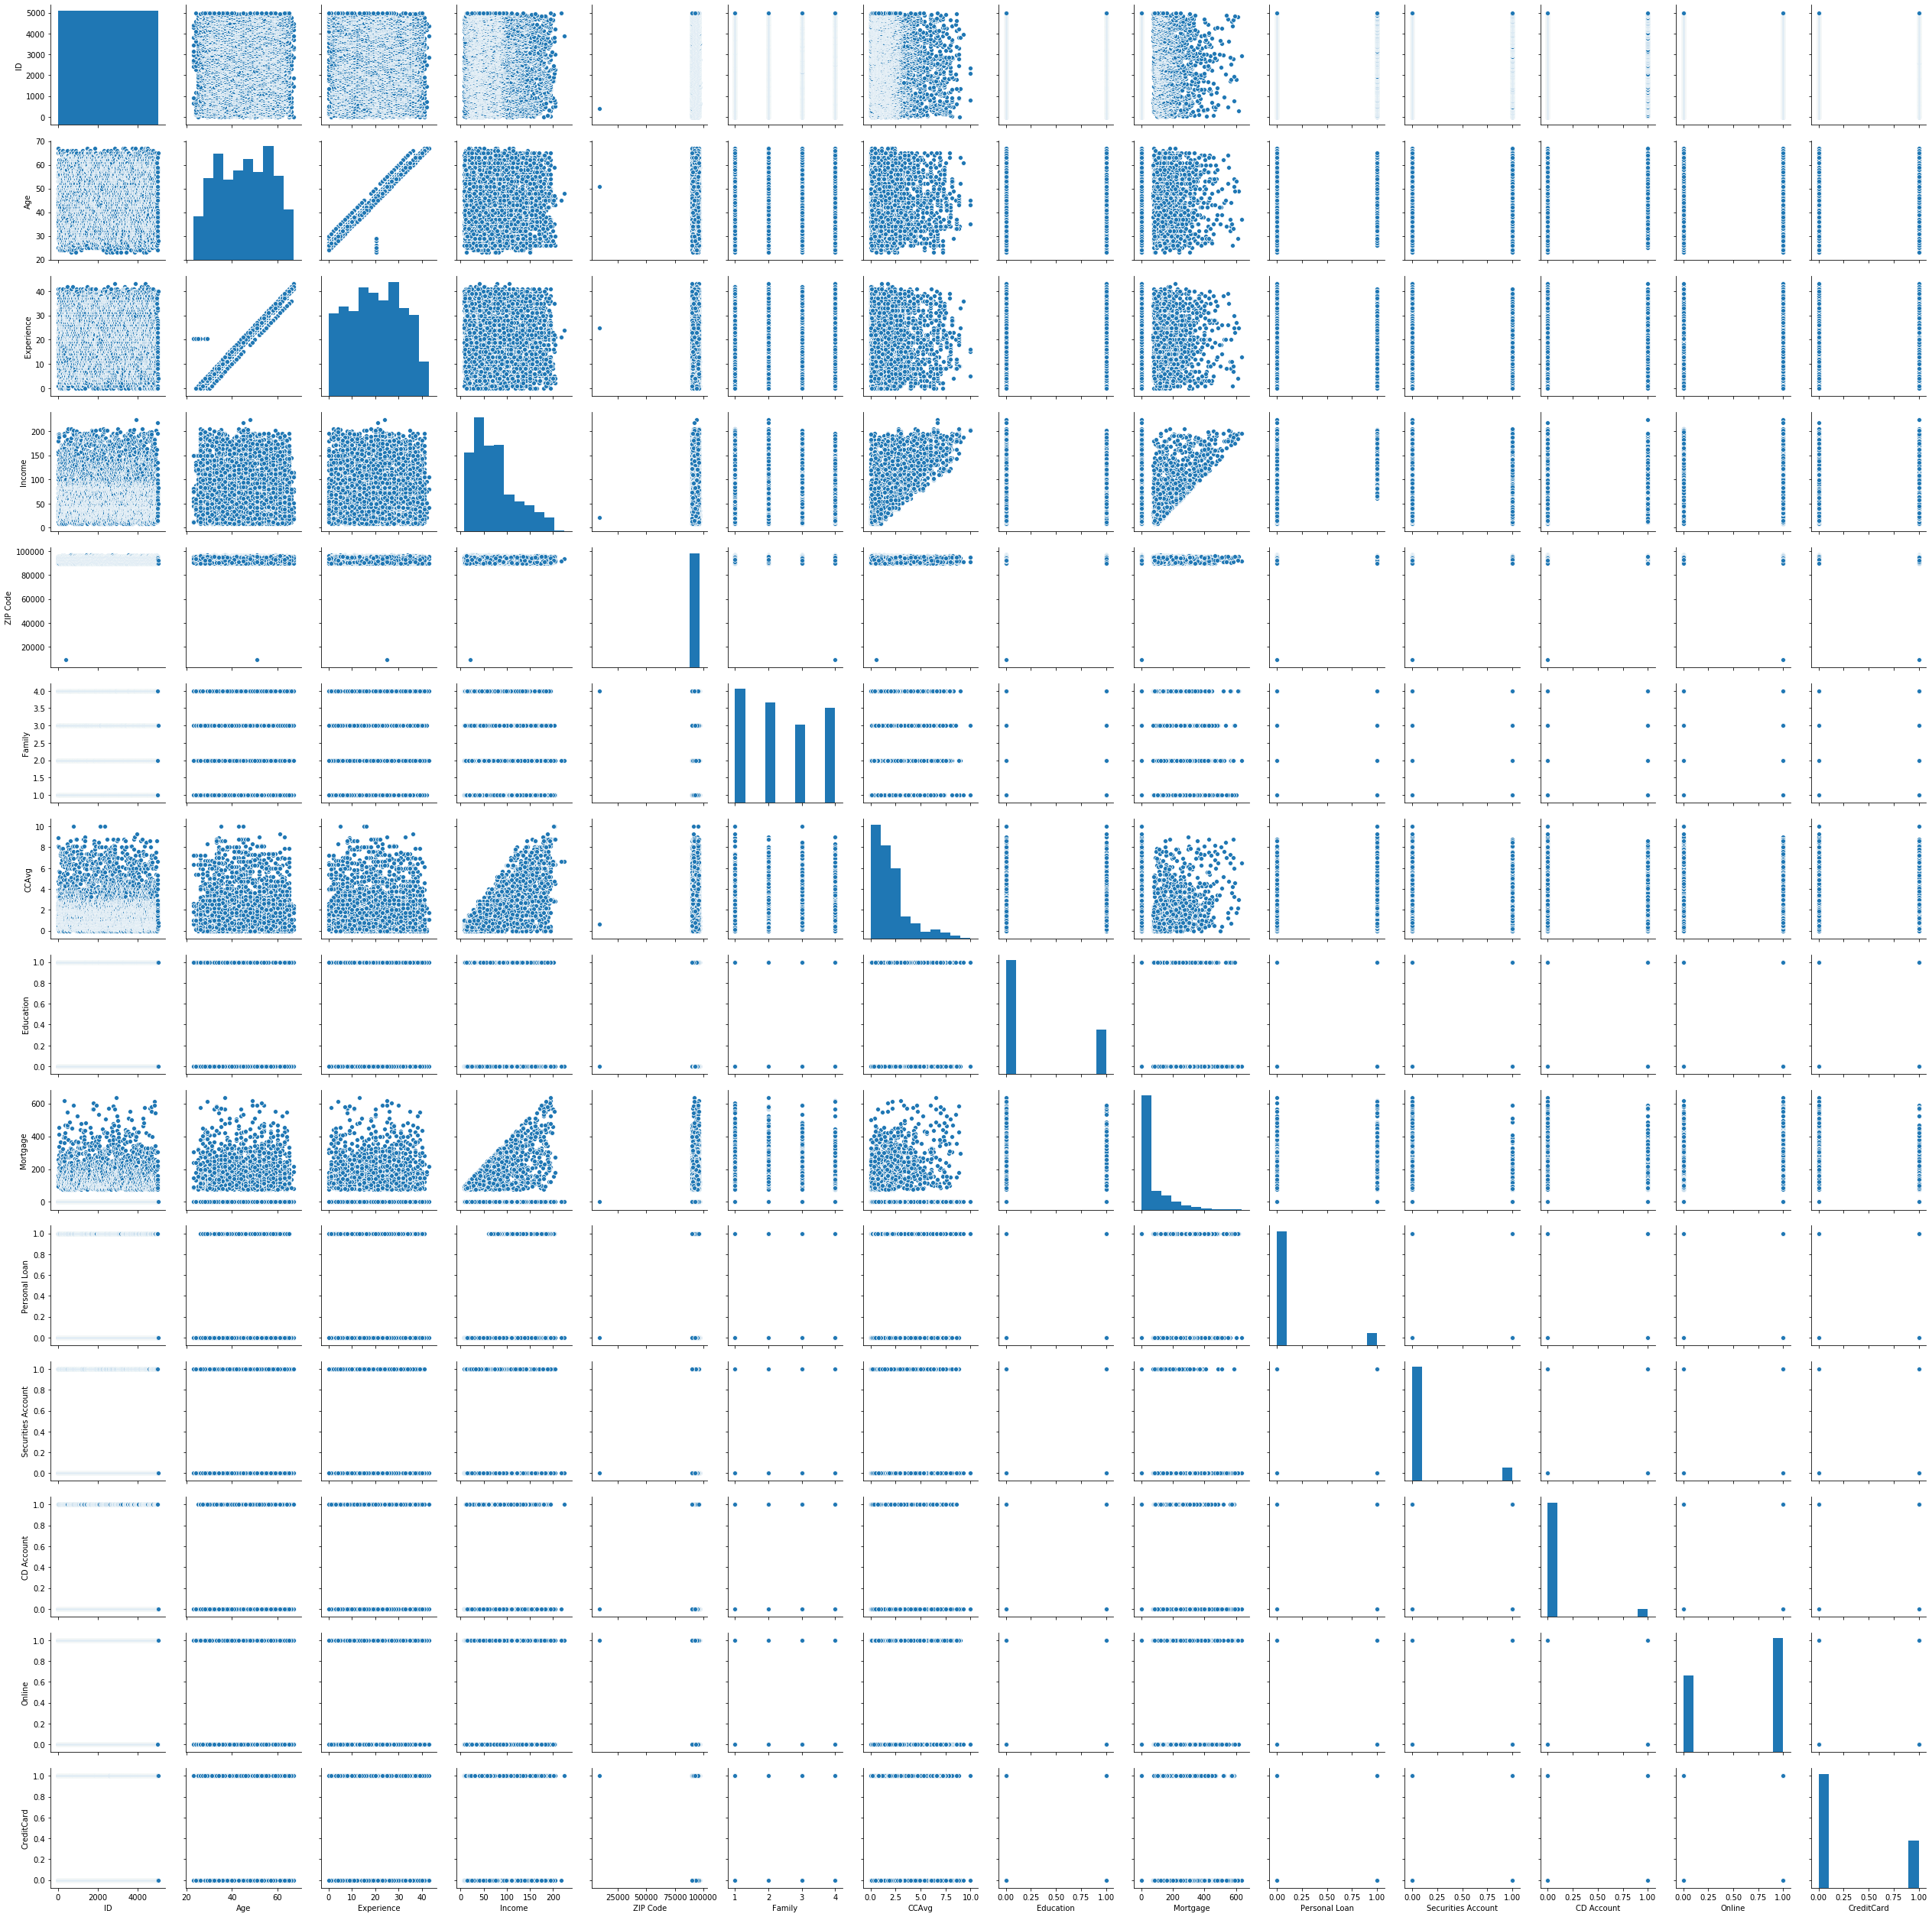

In [ ]:
#Analysing patterns of the variable
sns.pairplot(bank)

We could infer from above plots that
* 'ID' have unique values so we are removing the variable as it does not add value to model
* 'Age' and 'Experience' are highly correlated
* 'ZIP Code' have skewed data
* 'Mortgage' also have skewed data 

In [ ]:
#Measuring skewnss of numerical variable
bank[['ZIP Code','Experience','CCAvg','Income','Mortgage','Family','Age']].skew()


ZIP Code     -12.500221
Experience    -0.015018
CCAvg          1.598443
Income         0.841339
Mortgage       2.104002
Family         0.155221
Age           -0.029341
dtype: float64

* We could see from skew measurement that ZIP code is heavily skewed
* Mortgage and CCAvg also shows positive skeweness

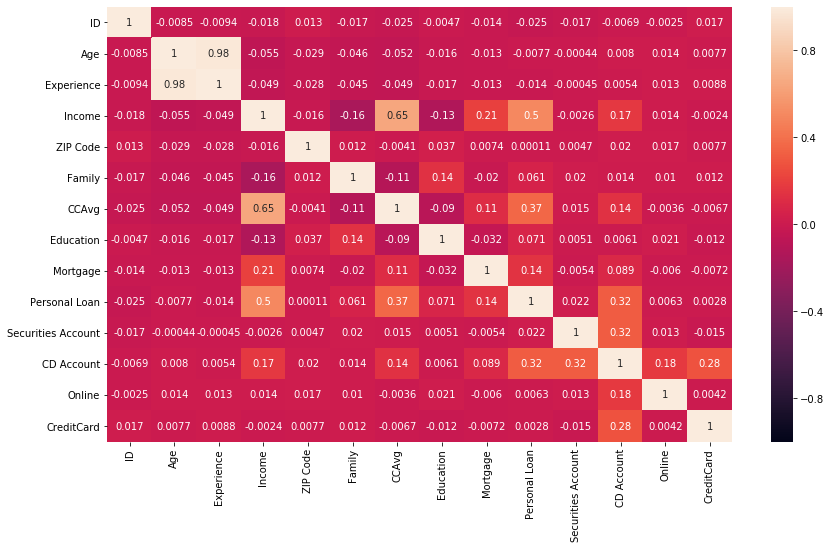

In [ ]:
#Correlation Matrix
df_cor=bank.corr()
plt.figure(figsize=(14,8))
sns.heatmap(df_cor,vmax=1.0,vmin=-1.0,annot=True)

* Age and Experience are perfectly correlated So we could one of the variable to avoid multicollinearity
* ZIP code and ID can be removed since they are not contributing much to model

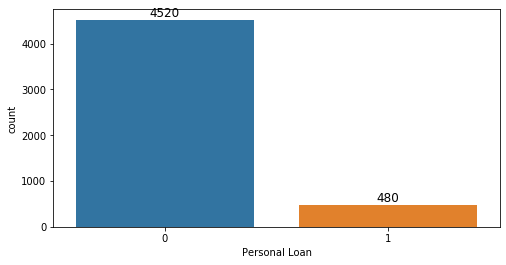

In [ ]:
#Distribution of Personal Loan
fig, ax = plt.subplots(figsize=(8,4))
ax=sns.countplot(x='Personal Loan',data=bank)
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),fontsize=12, ha='center', va='bottom')

Observation of the customer who took personal loan in previous campaign is very less than who have not took the loan

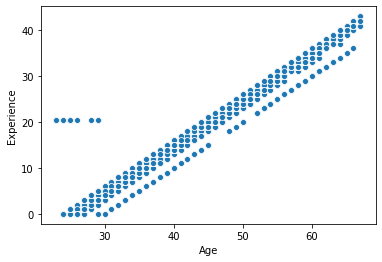

In [ ]:
#Scatter plot for Age and Experience
sns.scatterplot(bank['Age'],bank['Experience'])

Since Age and Experience is highly correlated we can remove any one of the variable from the model<br>
Im choosing to remove Experience since it has negative values which is not possible

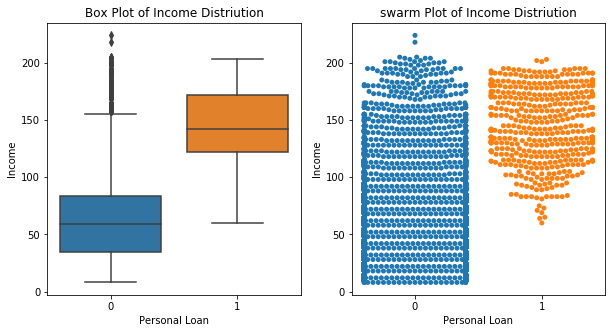

In [ ]:
#Personal loan and Income relationship pattern
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Box Plot of Income Distriution")
sns.boxplot('Personal Loan','Income',data=bank)

plt.subplot(1,2,2)
plt.title("swarm Plot of Income Distriution")
sns.swarmplot('Personal Loan','Income',data=bank)

* From the box plot we could understand that the person with more than approximately 52k dollars are taking personal loan so we should give more important to this group
* From the Swarm plot we could understand that the person with income between 100k dollars and 200k dollars are mostly taking personal loan

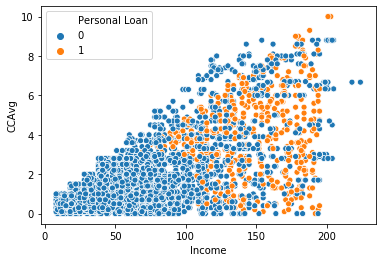

In [ ]:
sns.scatterplot(bank['Income'],bank['CCAvg'],hue=bank['Personal Loan'])

Average spending on Credit card expands as the income increases<br>
we could also see that approximately income more than 100000 dollars have took the personal loan So we could target more on the group who have more than 100,000 dollars as annual income

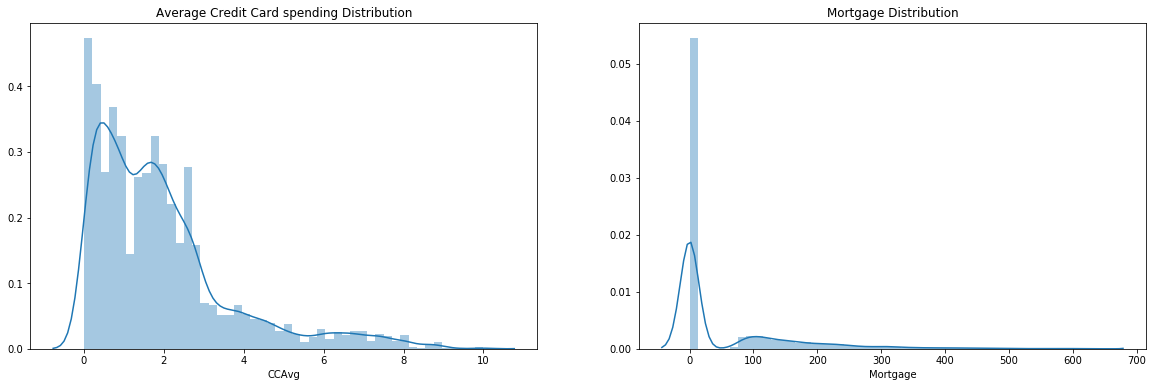

In [ ]:
#Distribution of CCAvg and Mortgage
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title("Average Credit Card spending Distribution")
sns.distplot(bank['CCAvg'])

plt.subplot(1,2,2)
plt.title("Mortgage Distribution")
sns.distplot(bank['Mortgage'])

* Average Credit Card spending is postivelt skewed and most spending between 0 and 4000 dollars per month
* Mortgage is highly skewed where most of them dont have mortgage
* We could see mortgage and Average credit card spending distributions are positively skewed

In [ ]:
#Removing 'Experience' gives low number in precticting 1 as 0
bnk_df=bank.drop(['ID','Experience','ZIP Code','Mortgage'],axis=1)
bnk_df.head()

,Age,Income,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,0,0,1,0,0,0
1,45,34,3,1.5,0,0,1,0,0,0
2,39,11,1,1.0,0,0,0,0,0,0
3,35,100,1,2.7,1,0,0,0,0,0
4,35,45,4,1.0,1,0,0,0,0,1


* Removing 'ID' and 'ZIP Code' because of uniqueness and does not add value to variable
* Removing 'Experience' since 'Age' and 'Experience' are highly correlated so we need to remove one variable to avoid    multicollinearity and also removing 'Experience' rather than 'Age' gives better model performance
* Removing 'Mortgage' since most of the data value is 0 and highly skewed


### Splitting the data

In [ ]:
X=bnk_df.drop(labels='Personal Loan',axis=1)#dependent variable
y=bnk_df['Personal Loan']#independent variable
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=40,stratify=y)#stratifying samples since we unbalanced class counts
x_col=x_train.columns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler=StandardScaler()
#scaler=MinMaxScaler()# this scaler is not showing good score when compared to standard scaler
x_train = pd.DataFrame(scaler.fit_transform(x_train))
x_test = pd.DataFrame(scaler.fit_transform(x_test))
bank_col=bnk_df.columns
x_train.columns=x_col
x_test.columns=x_col

In [ ]:
#Calculate VIF to understand Variable importance to model
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif=pd.DataFrame()
vif['features']=x_col
vif['VIF']=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
1,Income,1.84
3,CCAvg,1.78
6,CD Account,1.33
5,Securities Account,1.14
8,CreditCard,1.11
2,Family,1.05
4,Education,1.04
7,Online,1.04
0,Age,1.01


Income, Average Credit card spending and CD accounts are top 3 important variable to the model

### Logistic Regression Model

In [1]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression
Log_model=LogisticRegression(random_state=30,solver='liblinear')
Log_model.fit(x_train,y_train)

#Predicting Test and Train data
y_train_pred=Log_model.predict(x_train)
y_test_pred=Log_model.predict(x_test)

#Obtaining Acurracy Score
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report
train_accuracy=accuracy_score(y_train,y_train_pred)
test_accuracy=accuracy_score(y_test,y_test_pred)
print("Train data accuracy for Logistic Regression Model: {0:2.2f}%".format(train_accuracy*100))
print("Test data accuracy for Logistic Regression Model: {0:2.2f}%".format(test_accuracy*100))

NameError: ignored

In [2]:
#Confusion Matrix
conf_mat=confusion_matrix(y_test,y_test_pred)
conf_mat_df=pd.DataFrame(conf_mat)

conf_train=confusion_matrix(y_train,y_train_pred)
conf_train_df=pd.DataFrame(conf_train)

plt.figure(figsize = (10,7))
plt.title("Confusion Matrix for LR Model Test Data")
sns.heatmap(conf_mat_df, annot=True,cmap='Blues', fmt='g')


NameError: ignored

In [ ]:
#Evaluation Metrics for Logistic Regression
from sklearn import metrics
print("Classification Report of Logistic Regression")
print(metrics.classification_report(y_test, y_test_pred, labels=[1, 0]))


In [ ]:
#ROC-AUC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, Log_model.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, Log_model.predict_proba(x_test)[:,1])
plt.figure(figsize=(10,7))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--',label='No Model')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of LR model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

ROC for Logistic Regression Model is 0.95

### NaiveBayes classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# Naive Bayes model
bank_model = GaussianNB()
bank_model.fit(x_train, y_train.ravel())


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#Predicting Model for Naive Bayes

bank_train_predict = bank_model.predict(x_train)
bank_test_predict = bank_model.predict(x_test)
from sklearn import metrics

print("Train data accuracy for Naive Bayes Model: {0:2.2f}%".format(metrics.accuracy_score(y_train, bank_train_predict)*100))
print("Test data accuracy for Naive Bayes Model: {0:2.2f}%".format(metrics.accuracy_score(y_test, bank_test_predict)*100))


Train data accuracy for Naive Bayes Model: 88.49%
Test data accuracy for Naive Bayes Model: 88.87%


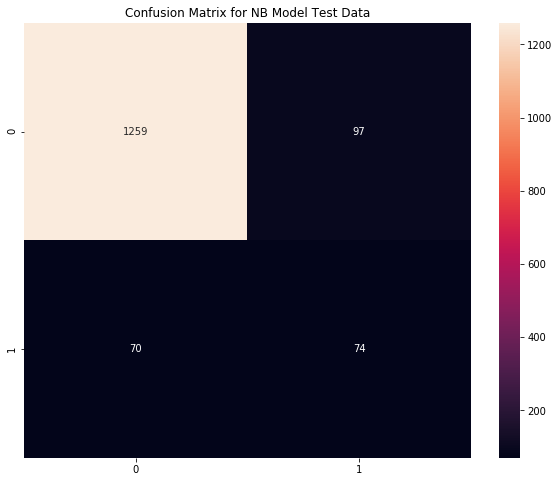

In [ ]:
cm=pd.DataFrame(metrics.confusion_matrix(y_test,bank_test_predict),index=[i for i in [0,1]],columns=[i for i in [0,1]])
plt.figure(figsize = (10,8))
plt.title("Confusion Matrix for NB Model Test Data")
sns.heatmap(cm, annot=True ,fmt='g')

In [ ]:
#Evaluation Metrics for Naive Bayes Model
print("Classification Report of Naive Bayes Model")
print(metrics.classification_report(y_test, bank_test_predict, labels=[1, 0]))

Classification Report of Naive Bayes Model
              precision    recall  f1-score   support

           1       0.43      0.51      0.47       144
           0       0.95      0.93      0.94      1356

    accuracy                           0.89      1500
   macro avg       0.69      0.72      0.70      1500
weighted avg       0.90      0.89      0.89      1500



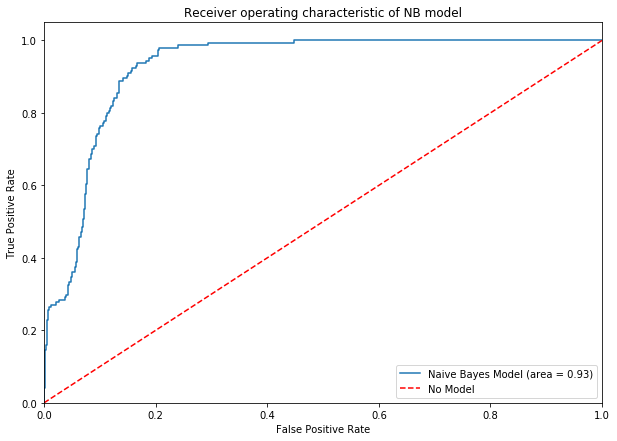

In [ ]:
#ROC-AUC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, bank_model.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, bank_model.predict_proba(x_test)[:,1])
plt.figure(figsize=(10,7))
plt.plot(fpr, tpr, label='Naive Bayes Model (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--',label='No Model')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of NB model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

ROC for Naive Bayes Model is 0.93

### K-Nearest Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
scores =[]
#finding optimal K value
for k in range(1,20):
    NNH=KNeighborsClassifier(n_neighbors=k,weights='distance')
    NNH=NNH.fit(x_train,y_train)#fitting model
    NNH_pred=NNH.predict(x_test)#Predicting values
    scores.append(NNH.score(x_test,y_test))

Text(0.5, 1.0, 'Accuracy plot for different K value')

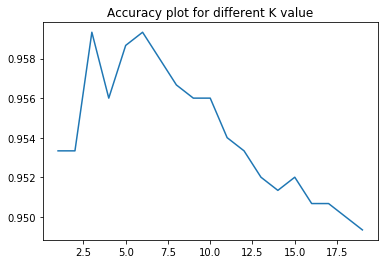

In [ ]:
plt.plot(range(1,20),scores)
plt.title("Accuracy plot for different K value")

From the above plot, so we could choose k= 3 which has the highest accuracy value

In [ ]:
#Fitting and Predicting KNN model
NNH=KNeighborsClassifier(n_neighbors=3,weights='distance')
NNH=NNH.fit(x_train,y_train)#fitting model
NNH_test_pred=NNH.predict(x_test)#Predicting values
NNH_train_pred=NNH.predict(x_train)

In [ ]:
#Accuracy score for Train and Test data
print("Train data accuracy for KNN Model: {0:2.2f}%".format(metrics.accuracy_score(y_train, NNH_train_pred)*100))
print("Test data accuracy for KNN Model: {0:2.2f}%".format(metrics.accuracy_score(y_test, NNH_test_pred)*100))

Train data accuracy for KNN Model: 100.00%
Test data accuracy for KNN Model: 95.93%


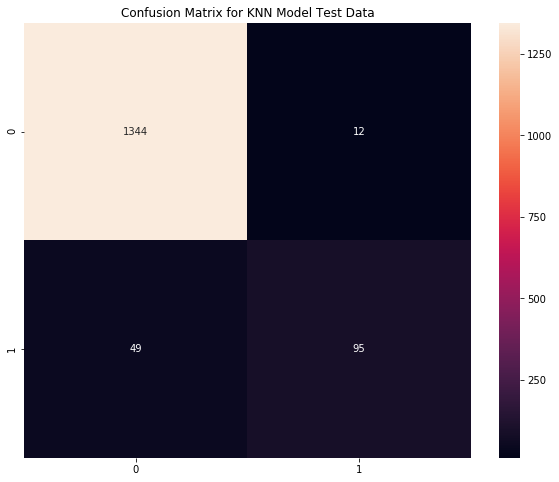

In [ ]:
cm=pd.DataFrame(metrics.confusion_matrix(y_test,NNH_test_pred),index=[i for i in [0,1]],columns=[i for i in [0,1]])
plt.figure(figsize = (10,8))
plt.title("Confusion Matrix for KNN Model Test Data")
sns.heatmap(cm, annot=True ,fmt='g')

In [ ]:
print("Classification Report for K Nearest Neighbour Classifier")
print(metrics.classification_report(y_test,NNH_test_pred))

Classification Report for K Nearest Neighbour Classifier
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1356
           1       0.89      0.66      0.76       144

    accuracy                           0.96      1500
   macro avg       0.93      0.83      0.87      1500
weighted avg       0.96      0.96      0.96      1500



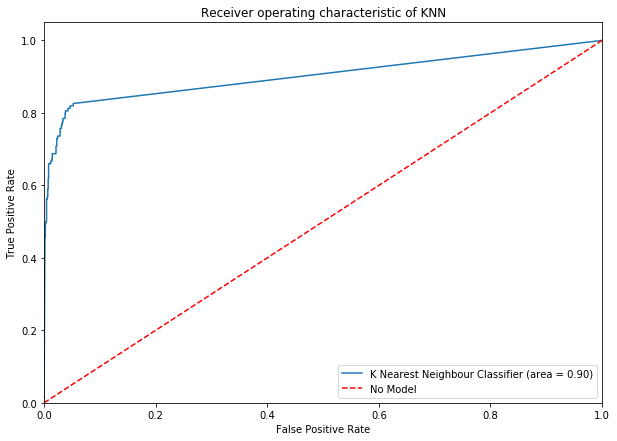

In [ ]:
#ROC-AUC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, NNH.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, NNH.predict_proba(x_test)[:,1])
plt.figure(figsize=(10,7))
plt.plot(fpr, tpr, label='K Nearest Neighbour Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--',label='No Model')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of KNN')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

ROC for K Nearest Neighbhour is 0.90

### Conclusion on the above 3 models performance

From the confusion matrix of the above three models, KNN performs better since number of wrong prediction of 1's as 0's is low which is nothing but the recall rate(66%) for '1' is high when compared to other models

From the objective of the problem we are interested in finding the person interested in taking personal loan So finding the model which have low number of wrong prediction 1's as 0's is a good model

When we compare the performance, KNN outperforms other models both in test and train data 

### Support Vector Machine Classifier

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',gamma=0.08, C=6)#rbf performs well when compared to other kernels

#fitting and predicting model
clf.fit(x_train , y_train)
clf_test_pred = clf.predict(x_test)
clf_train_pred = clf.predict(x_train)

In [ ]:
#Accuracy score for Train and Test data
print("Train data accuracy for SVM Model: {0:2.2f}%".format(metrics.accuracy_score(y_train, clf_train_pred)*100))
print("Test data accuracy for SVM Model: {0:2.2f}%".format(metrics.accuracy_score(y_test, clf_test_pred)*100))

Train data accuracy for SVM Model: 97.17%
Test data accuracy for SVM Model: 96.67%


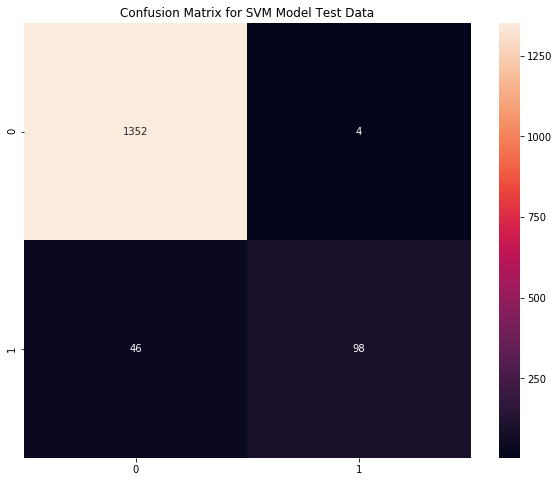

In [ ]:
#Confusion Matrix
cm=pd.DataFrame(metrics.confusion_matrix(y_test,clf_test_pred),index=[i for i in [0,1]],columns=[i for i in [0,1]])
plt.figure(figsize = (10,8))
plt.title("Confusion Matrix for SVM Model Test Data")
sns.heatmap(cm, annot=True ,fmt='g')


In [ ]:
#Evaluation metrics for SVM
print("Classification Report for Support Vector Machine")
print(metrics.classification_report(y_test,clf_test_pred, labels=[1, 0]))

Classification Report for Support Vector Machine
              precision    recall  f1-score   support

           1       0.96      0.68      0.80       144
           0       0.97      1.00      0.98      1356

    accuracy                           0.97      1500
   macro avg       0.96      0.84      0.89      1500
weighted avg       0.97      0.97      0.96      1500



Additional model I tried is SVM and it performed well than other models so I included in this notebook for reference